# time sync

In [164]:
import ephem
import matplotlib.pyplot as plt

In [3]:
u = ephem.Uranus()
u.compute('1781/3/13') 
print('%s %s %s' % (u.ra, u.dec, u.mag))

5:35:45.28 23:32:54.1 5.6


In [4]:
print(ephem.constellation(u))

('Tau', 'Taurus')


TLE from norad 

    GALASSIA                
    1 41170U 15077E   18291.47886069  .00002035  00000-0  73075-4 0  9998
    2 41170  14.9881 191.7979 0013088 334.9563  25.0122 15.13422614157130
    
    NUS observation locatoin
    1.2954752,103.7800079

In [41]:
my_loc = ephem.Observer()
my_loc.lat = '1.2954752'
my_loc.lon = '103.7800079'
my_loc.elevation = 100

In [20]:
name = 'GALASSIA'
line1 = '1 41170U 15077E   18291.47886069  .00002035  00000-0  73075-4 0  9998'
line2 = '2 41170  14.9881 191.7979 0013088 334.9563  25.0122 15.13422614157130'
my_sat = ephem.readtle(name,line1,line2)

In [21]:
info=my_loc.next_pass(my_sat)

    AOS stands for Acquisition of Signal
    TCA stands for Time of Closest Approach
    LOS stands for Loss of Signal (or Satellite)
    info []
    0  Rise time
    1  Rise azimuth
    2  Maximum altitude time (TCA- time of closed approach)
    3  Maximum altitude
    4  Set time
    5  Set azimuth
    
 All PyEphem dates are expressed in Universal Time (UTC)

In [22]:

print("AOS: %s \nLOS: %s \nMaximum Altitude: %s \nMaximum Altitude Time: %s" % (info[0], info[4], info[3], info[2]))

AOS: 2018/10/19 08:16:39 
LOS: 2018/10/19 08:27:30 
Maximum Altitude: 12:42:16.7 
Maximum Altitude Time: 2018/10/19 08:22:04


Saved pass

    AOS: 2018/10/19 06:34:18
    
    LOS: 2018/10/19 06:46:09 
    
    Maximum Altitude: 20:46:07.2 
    
    Maximum Altitude Time (TCA): 2018/10/19 06:40:12
    

In [23]:
info

(43390.8448990618,
 5.190250396728516,
 43390.84865361495,
 0.22173798084259033,
 43390.85242485742,
 0.917414665222168)

In [30]:
type(info[0])

ephem.Date

In [53]:
tca = info[4]

In [54]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: -5371.810546875 


In [75]:
my_loc.date = ephem.Date(tca - (ephem.minute *6))
#my_loc.date = info[0] + (ephem.minute *6)
#my_loc.date=ephem.Date('2018/10/19 06:40:12')

In [76]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: -946.2642822265625 


In [77]:
d = ephem.Date('2018/10/19 06:40:12')
nd = d + (ephem.minute * 3)

In [78]:
print (ephem.Date(nd) )

2018/10/19 06:43:12


In [81]:
ephem.localtime(d)

datetime.datetime(2018, 10, 19, 14, 40, 12, 4)

In [82]:
aos = (ephem.Date("2018/10/19 04:52:24") - ephem.minute* 10)

In [84]:
print(aos)

2018/10/19 04:52:24


In [85]:
my_loc.date = ephem.Date(aos)

In [86]:
print (my_loc.date)

2018/10/19 04:52:24


In [118]:
my_loc.date = ephem.Date("2018/10/19 04:45:13")

In [119]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: -6223.44287109375 


In [106]:
my_sat.el

AttributeError: 'ephem.EarthSatellite' object has no attribute 'el'

In [120]:
print (my_sat.alt)

-18:49:06.2


In [134]:
start_time = ephem.Date('2018/10/19 04:53:01')

In [145]:
v_list = []
t_list = []
alt_list = []
for i in range (600):
    d_time = ephem.Date(start_time + (ephem.second * i  ) )
    my_loc.date = d_time
    my_sat.compute(my_loc)
    v_list.append(my_sat.range_velocity)
    t_list.append(d_time)
    alt_list.append(my_sat.alt) 

In [160]:
f = 1e9

In [158]:
print(alt_list[400])

36:56:42.5


In [176]:
df_list = []
nt_list = [(x - start_time)*24*60*60 for x in t_list]
for dv in v_list:
    df = -(dv /ephem.c) * f
    df_list.append(df)

In [185]:
plt.plot(nt_list,df_list)
plt.title('Doppler shift of 1GHz clock')
plt.xlabel("time (seconds)")
plt.ylabel('Frequency shift in Hz')

Text(0,0.5,'Frequency shift in Hz')

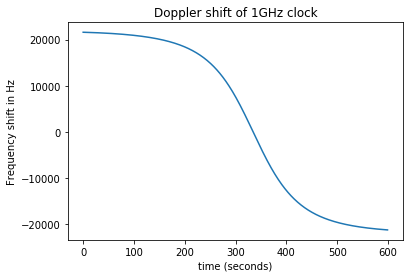

In [186]:
plt.savefig("DopplerShift.png") 
plt.show()